In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from datetime import datetime

matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)
plt.style.use(['fivethirtyeight'])
import seaborn as sns



from scipy import stats
import scipy.stats
from scipy.stats import shapiro
from scipy.stats import bartlett, levene
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse

from sklearn.tree import export_graphviz

import graphviz
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from IPython.core.display import display, HTML
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering,KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from dask.diagnostics import ProgressBar
#import statsmodels.api as sm
from statsmodels.api import Logit
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, f1_score, roc_curve, auc, precision_score,recall_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
np.random.seed(1234)
import pickle

display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.float_format', '{:.2e}'.format)

In [2]:
filename = 'rand_GB.model'
rand_GB = pickle.load(open(filename, 'rb'))

In [3]:
rand_GB

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(random_state=1234),
                   n_iter=5000, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5,
                                                          0.6000000000000001,
                                                          0.7000000000000001,
                                                          0.8, 0.9],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [4, 6, 8, 10, 12,
                                                              14, 16, 18, 20,
                                                              22, 24, 26, 28,
                                                              30, 32, 34, 36,
                                                              38],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [4]:
df = pd.read_csv('final_merged_dataset.csv')

In [5]:
df

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,...,Furance_Temp,RTA_Temp,count_ion,Target,Error_message,Wafer_map,chamber_total_count,chamber_path,defective,defective_chip_rate
0,NOLSM325131325,2,Oxidation,dry,1.21e+03,O2,2.67e+01,2.03e-01,120,7.13e+02,...,8.54e+02,154,582,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,7.05e-02
1,NOLSM326132326,2,Oxidation,dry,9.78e+02,O2,3.09e+01,2.17e-01,137,7.14e+02,...,8.95e+02,156,542,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2819,21122,0,2.75e-02
2,NOLSM327133327,2,Oxidation,dry,1.18e+03,O2,3.11e+01,2.18e-01,116,7.10e+02,...,8.98e+02,152,550,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2847,21133,0,4.80e-02
3,NOLSM328134328,2,Oxidation,dry,9.33e+02,O2,3.10e+01,1.96e-01,143,7.11e+02,...,8.79e+02,155,582,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,5.25e-02
4,NOLSM329135329,2,Oxidation,wet,1.14e+03,H2O,3.14e+01,2.15e-01,76,7.12e+02,...,8.82e+02,155,542,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2819,21122,0,3.95e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,NOLSM3081211,1,Oxidation,dry,1.16e+03,O2,3.46e+01,1.99e-01,18,7.10e+02,...,8.83e+02,153,582,105,none,[[0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 0 0 0 0 0 0 ...,2902,13311,0,5.25e-02
1654,NOLSM8493212,1,Oxidation,wet,1.27e+03,H2O,4.51e+01,2.15e-01,22,7.07e+02,...,8.67e+02,152,550,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2878,11133,0,2.10e-02
1655,NOLSM8503213,1,Oxidation,wet,1.28e+03,H2O,4.51e+01,2.14e-01,21,7.13e+02,...,8.68e+02,152,542,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2821,11222,0,2.10e-02
1656,NOLSM8513214,1,Oxidation,wet,1.27e+03,H2O,4.53e+01,2.13e-01,20,7.12e+02,...,8.68e+02,152,582,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2938,11311,0,1.20e-02


In [9]:
temp_df = df[['temp_softbake', 'Flux90s', 'Selectivity', 'spin1','Temp_OXid', 'Source_Power', 'defective']]

In [10]:
temp_df

,temp_softbake,Flux90s,Selectivity,spin1,Temp_OXid,Source_Power,defective
0,9.19e+01,1.32e+17,1.03e+00,5.02e+02,1.21e+03,5.21e+01,0
1,9.10e+01,4.37e+16,1.04e+00,5.07e+02,9.78e+02,5.20e+01,0
2,9.20e+01,1.51e+16,1.00e+00,5.01e+02,1.18e+03,5.08e+01,0
3,9.15e+01,1.02e+17,1.02e+00,5.03e+02,9.33e+02,5.17e+01,0
4,9.47e+01,7.88e+16,1.04e+00,5.01e+02,1.14e+03,5.08e+01,0
...,...,...,...,...,...,...,...
1653,9.25e+01,1.15e+17,1.00e+00,4.98e+02,1.16e+03,5.12e+01,0
1654,9.32e+01,5.43e+16,1.01e+00,5.04e+02,1.27e+03,5.04e+01,0
1655,9.35e+01,7.67e+15,1.01e+00,5.03e+02,1.28e+03,5.06e+01,0
1656,9.35e+01,2.79e+16,1.01e+00,5.04e+02,1.27e+03,5.05e+01,0


In [11]:
temp_df.describe()

,temp_softbake,Flux90s,Selectivity,spin1,Temp_OXid,Source_Power,defective
count,1.66e+03,1.66e+03,1.66e+03,1.66e+03,1.66e+03,1.66e+03,1.66e+03
mean,9.20e+01,8.07e+16,1.03e+00,5.01e+02,1.07e+03,5.12e+01,7.30e-02
std,1.46e+00,5.43e+16,1.65e-02,2.99e+00,1.50e+02,6.43e-01,2.60e-01
min,8.65e+01,3.85e+09,9.84e-01,4.92e+02,8.62e+02,4.93e+01,0.00e+00
25%,9.11e+01,3.26e+16,1.02e+00,4.99e+02,8.89e+02,5.08e+01,0.00e+00
50%,9.20e+01,8.25e+16,1.03e+00,5.01e+02,1.07e+03,5.12e+01,0.00e+00
75%,9.30e+01,1.22e+17,1.04e+00,5.03e+02,1.19e+03,5.17e+01,0.00e+00
max,9.67e+01,2.72e+17,1.08e+00,5.09e+02,1.31e+03,5.33e+01,1.00e+00


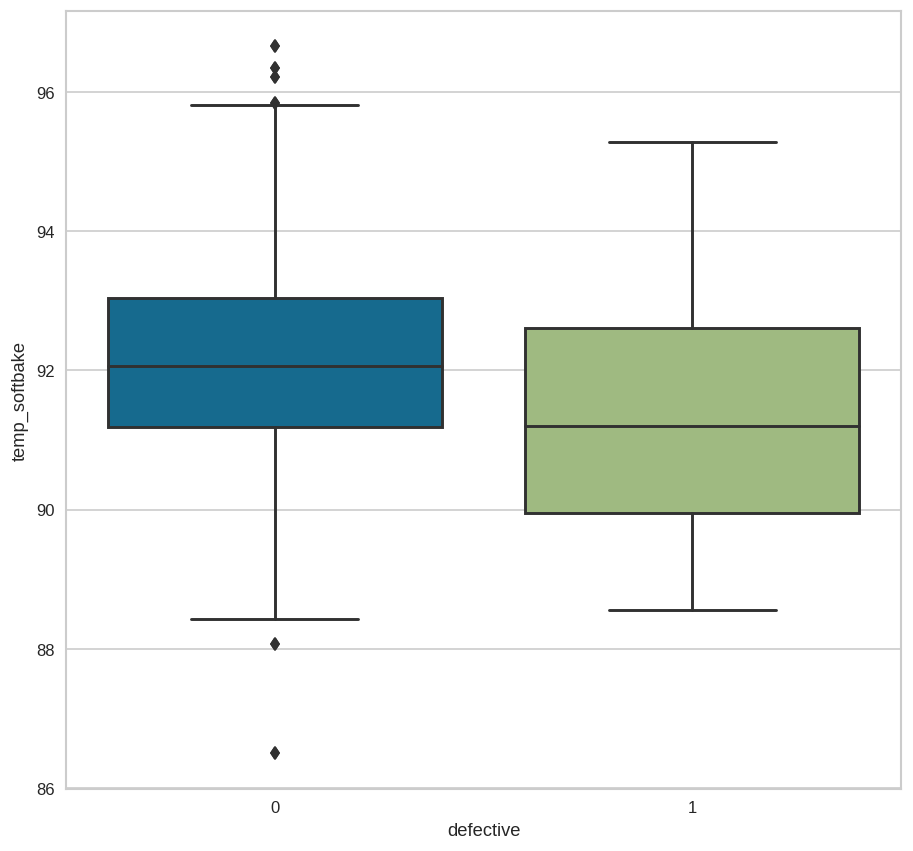

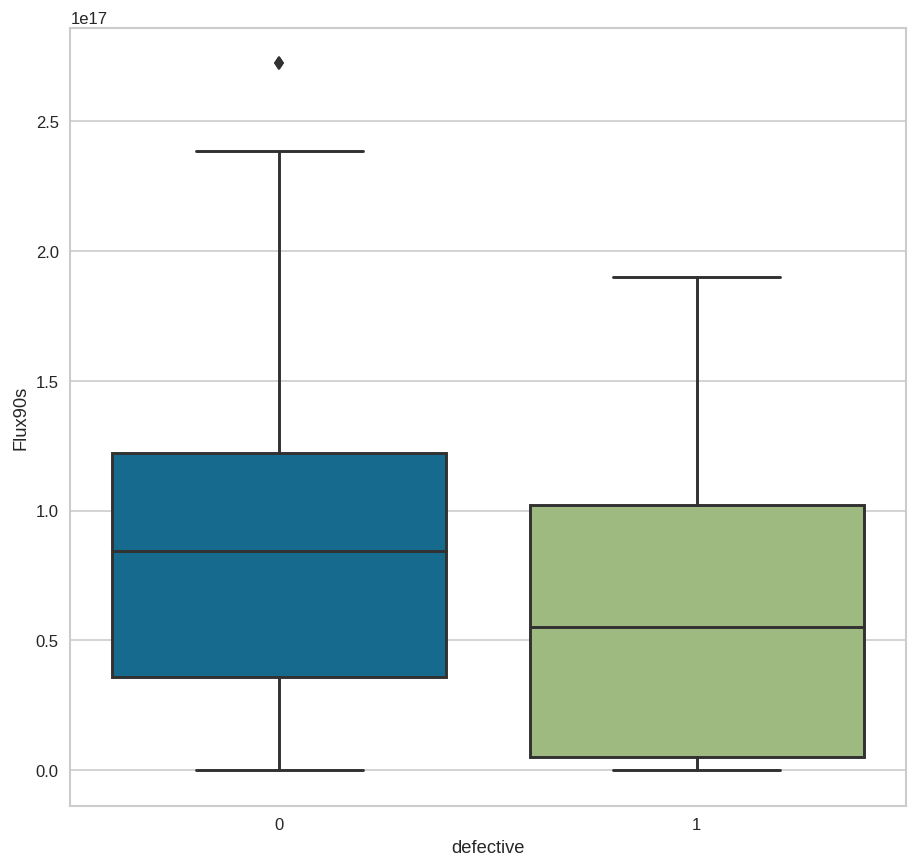

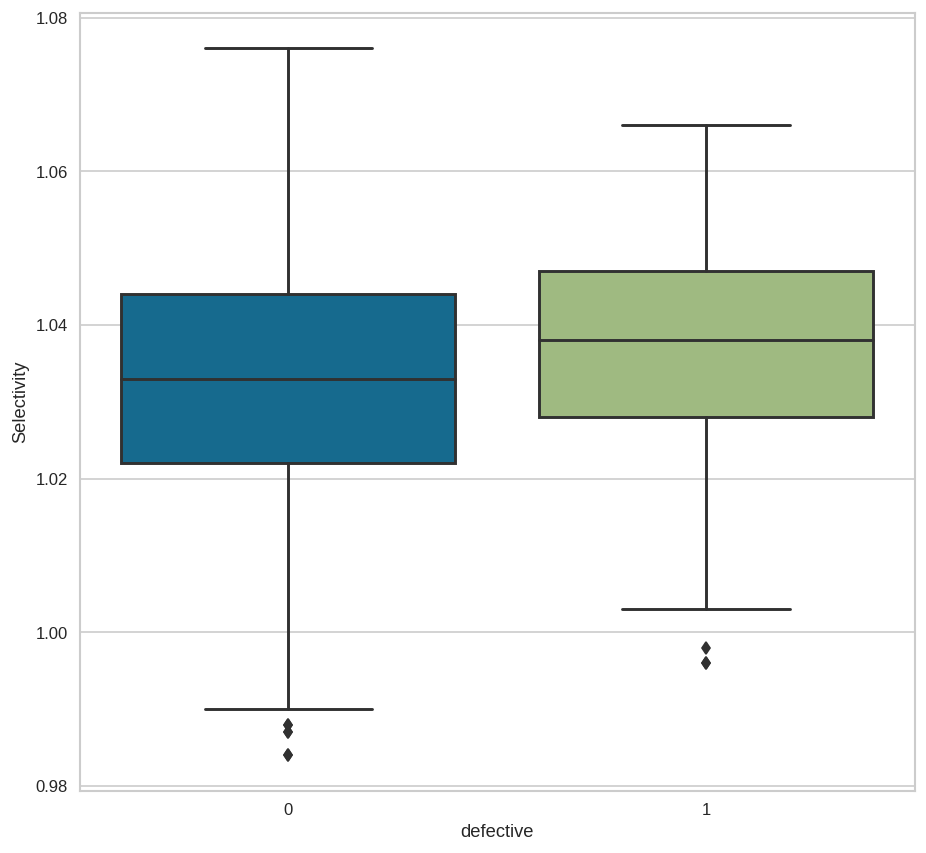

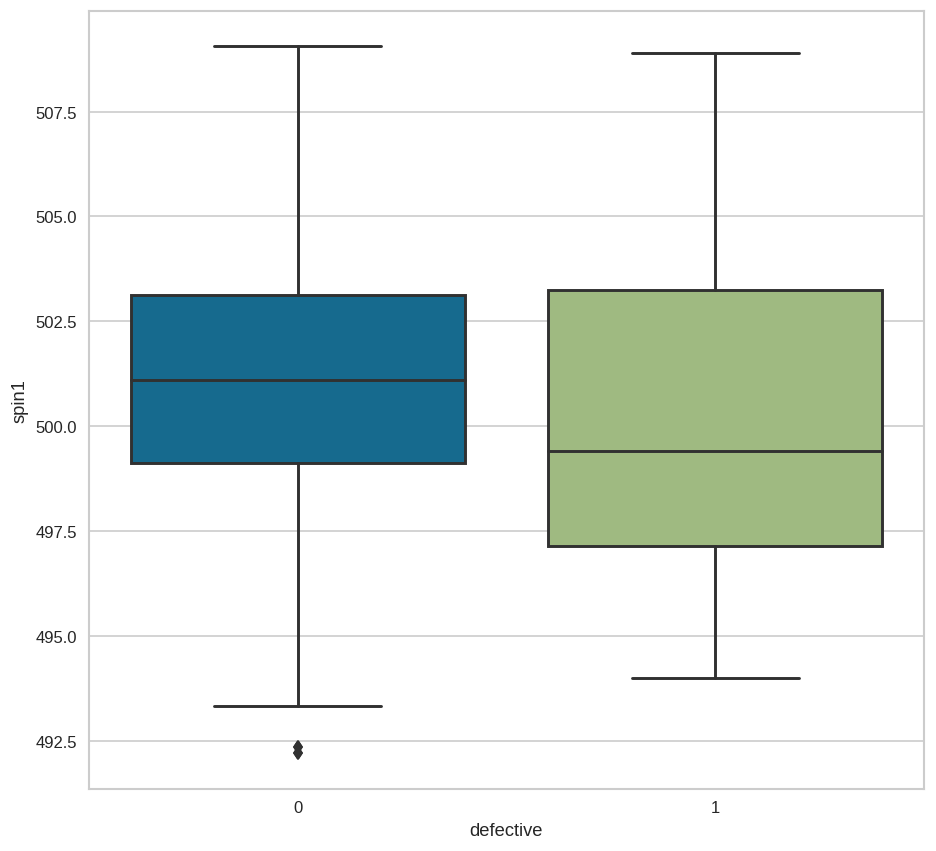

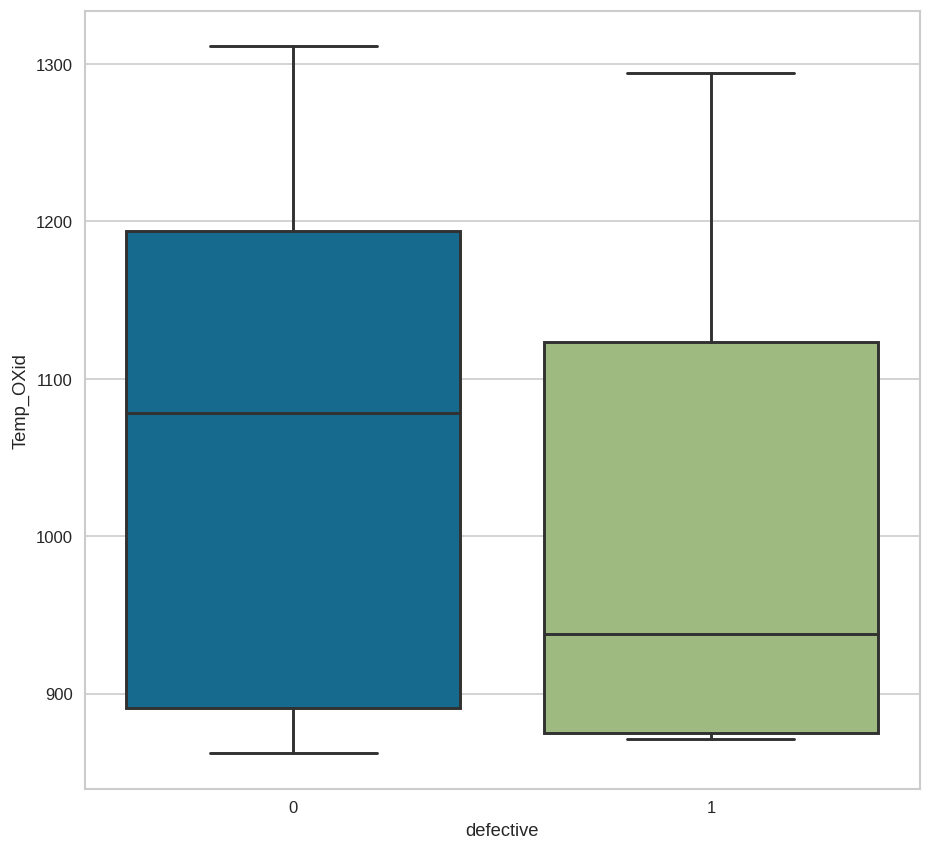

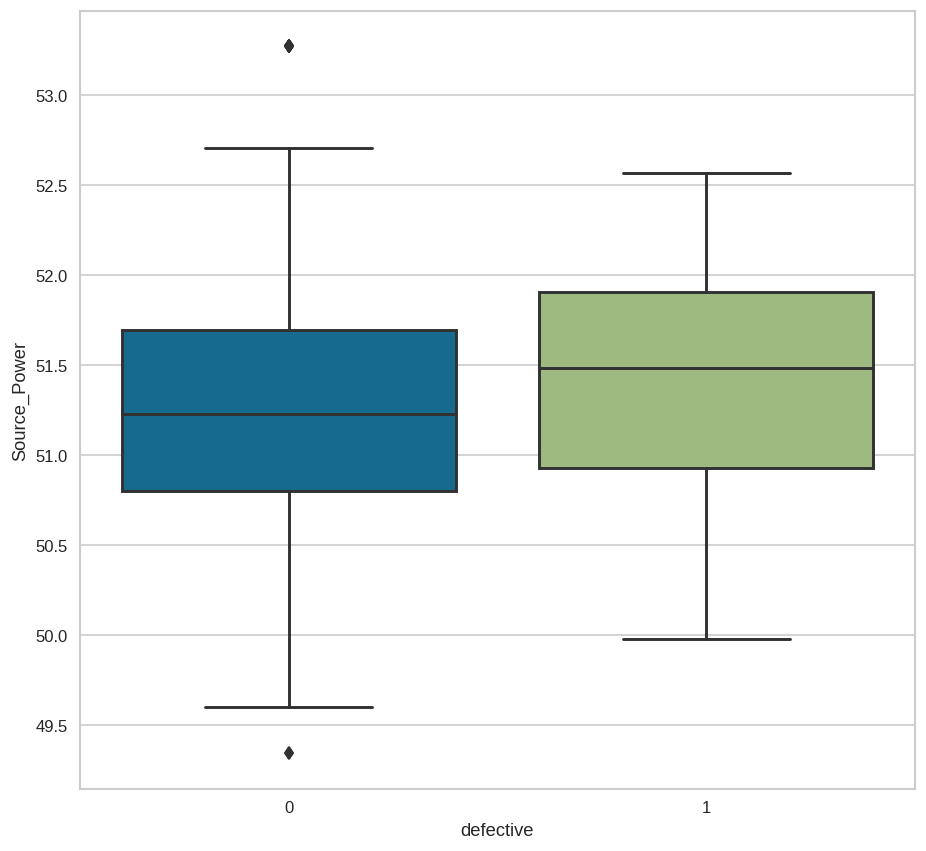

In [27]:
for i in ['temp_softbake', 'Flux90s', 'Selectivity', 'spin1','Temp_OXid', 'Source_Power']:
    plt.figure(dpi=120, figsize = (8,8))
    sns.boxplot(x = 'defective' , y = i, data = temp_df)
    plt.show()

In [59]:
print(temp_df['Flux90s'].max())
print(temp_df['Flux90s'].min())


q1=temp_df['Flux90s'].quantile(0.25)
q2=temp_df['Flux90s'].quantile(0.5)
q3=temp_df['Flux90s'].quantile(0.75)
iqr=q3-q1

condition_1 = q3+1.5*iqr
condition_2 = q1-1.5*iqr


temp_df['Flux90s'] = temp_df['Flux90s'].apply(lambda x: condition_1 if x > condition_1 else x)
temp_df['Flux90s'] = temp_df['Flux90s'].apply(lambda x: condition_2 if x < condition_2 else x)

print(temp_df['Flux90s'].max())
print(temp_df['Flux90s'].min())

2.720974e+17
3846247470.0
2.55631525e+17
3846247470.0


/tmp/ipykernel_5007/67819908.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Flux90s'] = temp_df['Flux90s'].apply(lambda x: condition_1 if x > condition_1 else x)
/tmp/ipykernel_5007/67819908.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Flux90s'] = temp_df['Flux90s'].apply(lambda x: condition_2 if x < condition_2 else x)


In [60]:
print(temp_df['temp_softbake'].max())
print(temp_df['temp_softbake'].min())

q1=temp_df['temp_softbake'].quantile(0.25)
q2=temp_df['temp_softbake'].quantile(0.5)
q3=temp_df['temp_softbake'].quantile(0.75)
iqr=q3-q1

condition_1 = q3+1.5*iqr
condition_2 = q1-1.5*iqr

temp_df['temp_softbake'] = temp_df['temp_softbake'].apply(lambda x: condition_1 if x > condition_1 else x)
temp_df['temp_softbake'] = temp_df['temp_softbake'].apply(lambda x: condition_2 if x < condition_2 else x)

print(temp_df['temp_softbake'].max())
print(temp_df['temp_softbake'].min())

96.653
86.498
95.957
88.14100000000002


/tmp/ipykernel_5007/571315953.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['temp_softbake'] = temp_df['temp_softbake'].apply(lambda x: condition_1 if x > condition_1 else x)
/tmp/ipykernel_5007/571315953.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['temp_softbake'] = temp_df['temp_softbake'].apply(lambda x: condition_2 if x < condition_2 else x)


In [61]:
print(temp_df['Energy_Exposure'].max())
print(temp_df['Energy_Exposure'].min())

q1=temp_df['Energy_Exposure'].quantile(0.25)
q2=temp_df['Energy_Exposure'].quantile(0.5)
q3=temp_df['Energy_Exposure'].quantile(0.75)
iqr=q3-q1

condition_1 = q3+1.5*iqr
condition_2 = q1-1.5*iqr

temp_df['Energy_Exposure'] = temp_df['Energy_Exposure'].apply(lambda x: condition_1 if x > condition_1 else x)
temp_df['Energy_Exposure'] = temp_df['Energy_Exposure'].apply(lambda x: condition_2 if x < condition_2 else x)

print(temp_df['Energy_Exposure'].max())
print(temp_df['Energy_Exposure'].min())

112.069
103.407
112.069
103.9145


/tmp/ipykernel_5007/551810277.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Energy_Exposure'] = temp_df['Energy_Exposure'].apply(lambda x: condition_1 if x > condition_1 else x)
/tmp/ipykernel_5007/551810277.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Energy_Exposure'] = temp_df['Energy_Exposure'].apply(lambda x: condition_2 if x < condition_2 else x)


In [62]:
print(temp_df['ppm'].max())
print(temp_df['ppm'].min())

q1=temp_df['ppm'].quantile(0.25)
q2=temp_df['ppm'].quantile(0.5)
q3=temp_df['ppm'].quantile(0.75)
iqr=q3-q1

condition_1 = q3+1.5*iqr
condition_2 = q1-1.5*iqr

temp_df['ppm'] = temp_df['ppm'].apply(lambda x: condition_1 if x > condition_1 else x)
temp_df['ppm'] = temp_df['ppm'].apply(lambda x: condition_2 if x < condition_2 else x)

print(temp_df['ppm'].max())
print(temp_df['ppm'].min())

49.91
21.07
49.91
21.07


/tmp/ipykernel_5007/1460875334.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ppm'] = temp_df['ppm'].apply(lambda x: condition_1 if x > condition_1 else x)
/tmp/ipykernel_5007/1460875334.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ppm'] = temp_df['ppm'].apply(lambda x: condition_2 if x < condition_2 else x)


In [63]:
for i in ['temp_softbake', 'Flux90s', 'Selectivity', 'spin1','Temp_OXid', 'Source_Power']:
    plt.figure(dpi=120, figsize = (8,8))
    sns.boxplot(x = 'defective' , y = i, data = temp_df)
    plt.show()print(temp_df['Source_Power'].max())
print(temp_df['Source_Power'].min())

q1=temp_df['Source_Power'].quantile(0.25)
q2=temp_df['Source_Power'].quantile(0.5)
q3=temp_df['Source_Power'].quantile(0.75)
iqr=q3-q1

condition_1 = q3+1.5*iqr
condition_2 = q1-1.5*iqr

temp_df['Source_Power'] = temp_df['Source_Power'].apply(lambda x: condition_1 if x > condition_1 else x)
temp_df['Source_Power'] = temp_df['Source_Power'].apply(lambda x: condition_2 if x < condition_2 else x)

print(temp_df['Source_Power'].max())
print(temp_df['Source_Power'].min())

53.272
49.342
53.042125000000006
49.463125


/tmp/ipykernel_5007/3709454835.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Source_Power'] = temp_df['Source_Power'].apply(lambda x: condition_1 if x > condition_1 else x)
/tmp/ipykernel_5007/3709454835.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Source_Power'] = temp_df['Source_Power'].apply(lambda x: condition_2 if x < condition_2 else x)


In [29]:
plt.style.use(['fivethirtyeight'])

In [31]:
plt.style.use(['fivethirtyeight'])

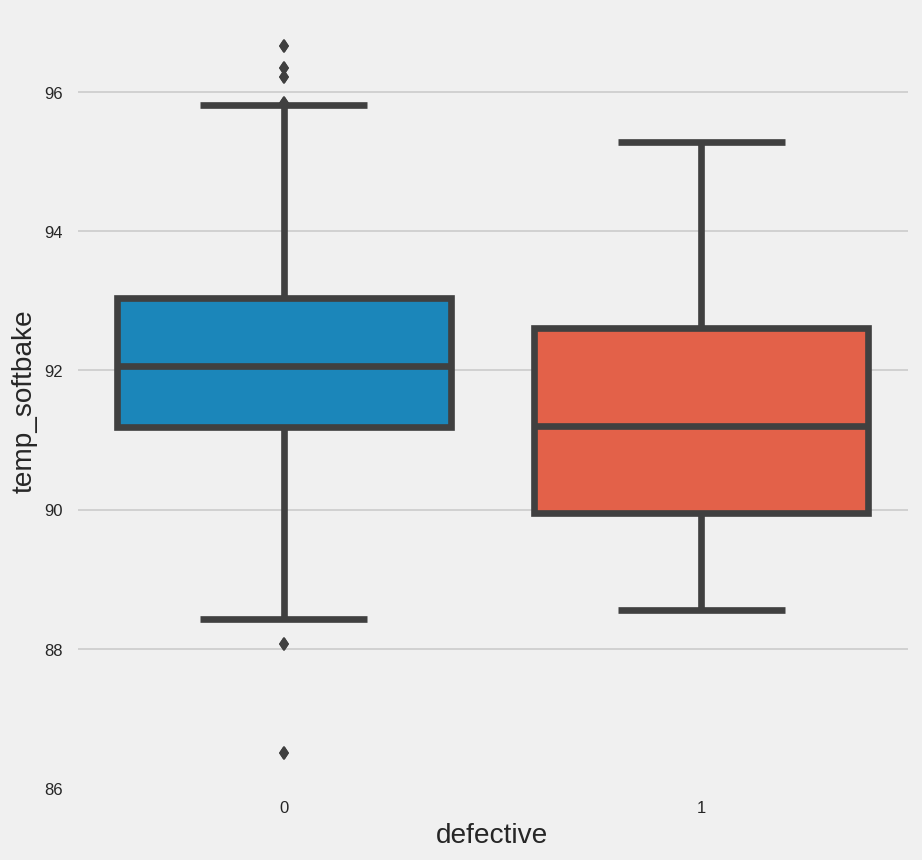

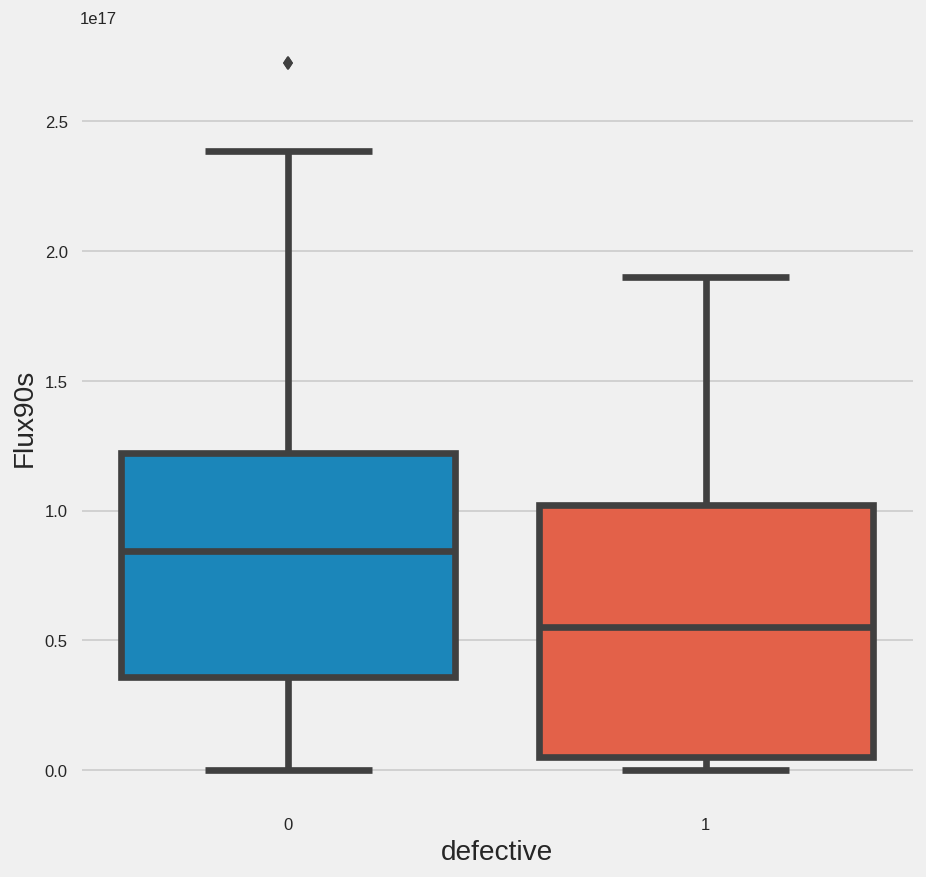

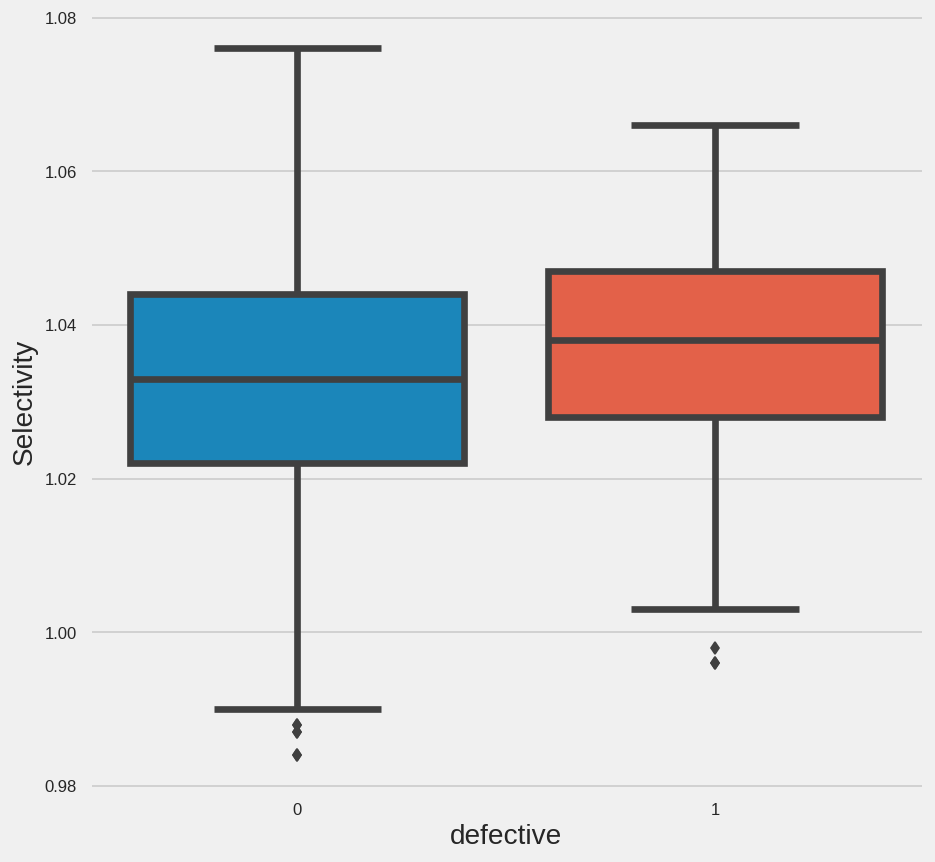

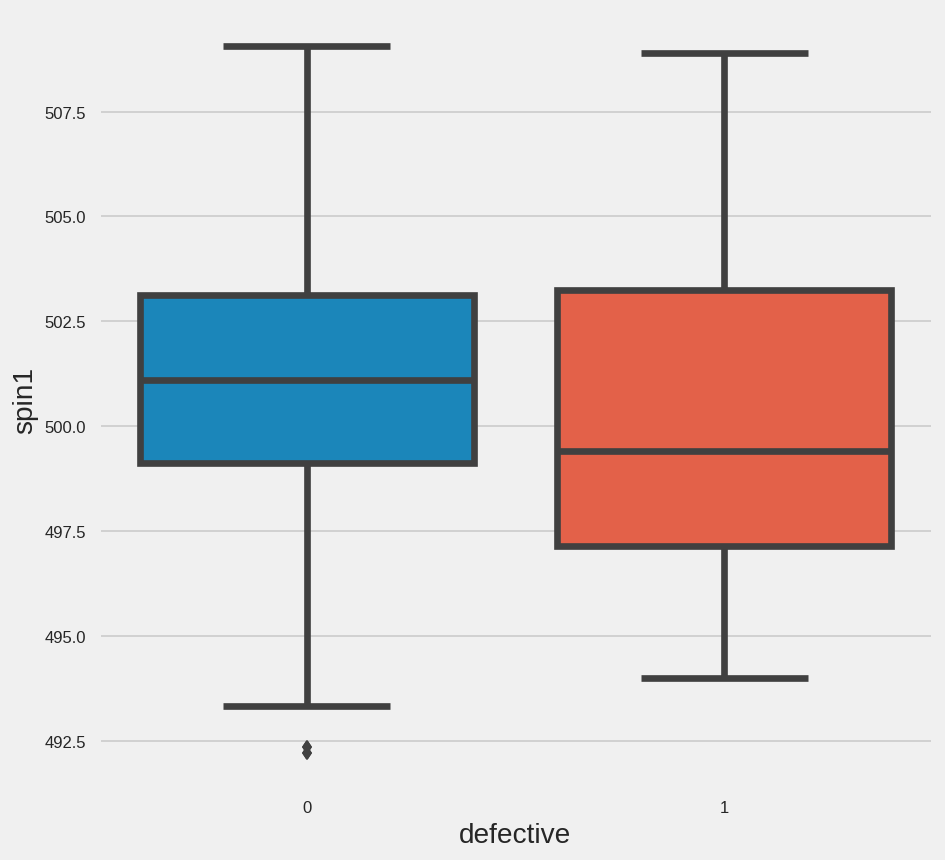

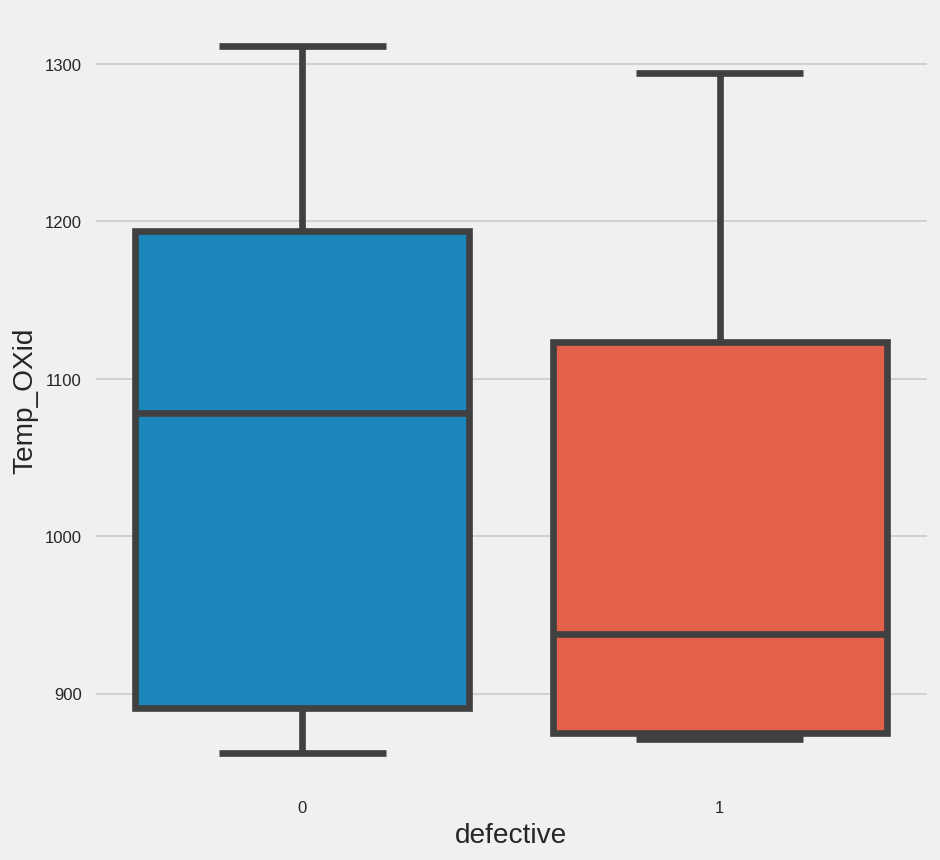

In [38]:
for i in ['temp_softbake', 'Flux90s', 'Selectivity', 'spin1','Temp_OXid']:
    plt.figure(dpi=120, figsize = (8,8))
    sns.boxplot(x = 'defective' , y = i, data = temp_df)
    plt.show()

# 최적구간설정

In [22]:
good_range = pd.DataFrame(columns = ['variable', 'down_range', 'up_range'])

In [23]:
good_range

variable_list = []
down_range_list = []
up_range_list = []

In [24]:
for i in ['temp_softbake', 'Flux90s', 'Selectivity', 'spin1','Temp_OXid', 'Source_Power']:
    max_0 = temp_df[temp_df['defective'] == 0][i].max()
    min_0 = temp_df[temp_df['defective'] == 0][i].min()
    
    max_1 = temp_df[temp_df['defective'] == 1][i].max()
    min_1 = temp_df[temp_df['defective'] == 1][i].min()
    
    variable_list.append(i)
    down_range_list.append([min_0, min_1])
    up_range_list.append([max_0, max_1])

In [25]:
good_range['variable'] = variable_list
good_range['down_range'] = down_range_list
good_range['up_range'] = up_range_list


In [26]:
good_range

,variable,down_range,up_range
0,temp_softbake,"[86.498, 88.551]","[96.653, 95.28]"
1,Flux90s,"[17434023167.0, 3846247470.0]","[2.720974e+17, 1.900112e+17]"
2,Selectivity,"[0.984, 0.996]","[1.076, 1.066]"
3,spin1,"[492.196, 493.983]","[509.055, 508.904]"
4,Temp_OXid,"[862.01127574, 871.01062097]","[1311.2254351, 1294.5232503]"
5,Source_Power,"[49.342, 49.98]","[53.272, 52.567]"


In [33]:
good_range_final = pd.DataFrame(columns = ['variable', 'good_range'])

In [34]:
good_range_final

,variable,good_range


In [37]:
good_range_final['variable'] = good_range['variable']

In [82]:
format(good_range['up_range'][0][1], 'f')

'190011200000000000.000000'

In [36]:
format(good_range['up_range'][1][0], 'f'), format(good_range['up_range'][1][1], 'f')

('272097400000000000.000000', '190011200000000000.000000')

In [39]:
good_range_final['good_range'] = [good_range['up_range'][0], good_range['up_range'][1],
                                  good_range['down_range'][2], good_range['down_range'][3],
                                 good_range['up_range'][4], good_range['down_range'][5]]

In [40]:
good_range_final

,variable,good_range
0,temp_softbake,"[96.653, 95.28]"
1,Flux90s,"[2.720974e+17, 1.900112e+17]"
2,Selectivity,"[0.984, 0.996]"
3,spin1,"[492.196, 493.983]"
4,Temp_OXid,"[1311.2254351, 1294.5232503]"
5,Source_Power,"[49.342, 49.98]"


In [41]:
good_range_final.to_csv('최적구간_final_change.csv', index=False)